In [9]:
import numpy as np
import tensorflow as tf
import sklearn.metrics as sklearn_metrics
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import constants
import loader
import os

In [10]:
# Set current working directory to the project folder
os.chdir("..")

In [11]:
# Load test dataset
print("Loading test dataset...")
dataset = loader.load_dataset(usages=set(["PrivateTest"]))
x_test = dataset["PrivateTest"]["x"]
y_test = dataset["PrivateTest"]["y"]

Loading test dataset...
Loading dataset pixels...
Loading dataset labels...


In [12]:
# Load the model
print("Loading the model...")
model: tf.keras.Sequential = tf.keras.models.load_model(constants.BEST_MODEL_DIR_PATH)

Loading the model...


In [13]:
# Evaluate the model
metrics = model.evaluate(x=x_test, y=y_test, batch_size=constants.BATCH_SIZE, return_dict=True)
print(metrics)

225/225 [==============================] - 16s 20ms/step - loss: 0.8703 - accuracy: 0.7679
{'loss': 0.8703444004058838, 'accuracy': 0.7679018974304199}


In [14]:
# Predict from the model
y_pred = model.predict(x=x_test, batch_size=constants.BATCH_SIZE)
y_pred = np.argmax(y_pred, axis=1)

225/225 [==============================] - 4s 14ms/step


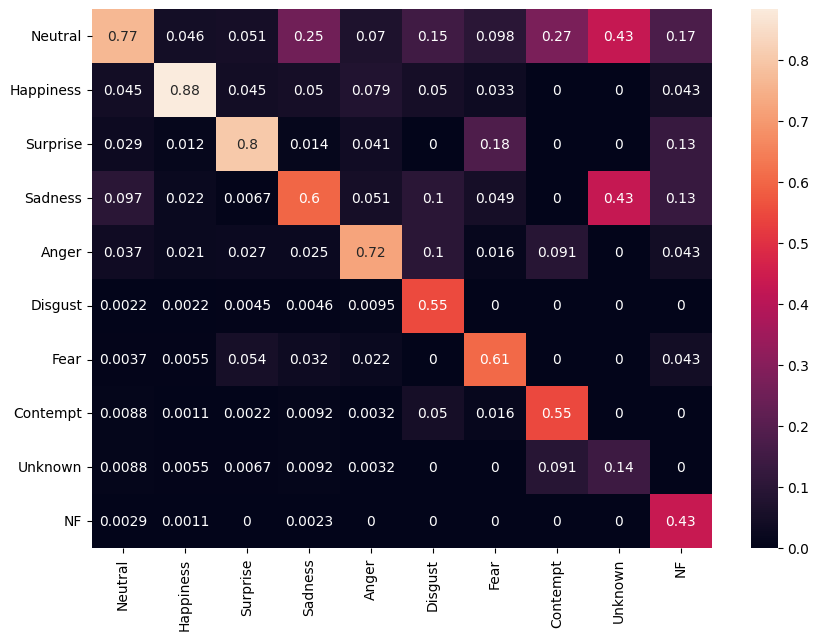

In [15]:
# Plot a confusion matrix and save the result
result = sklearn_metrics.confusion_matrix(y_test, y_pred, normalize="pred")
df_cm = pd.DataFrame(result, index=constants.LABELS, columns=constants.LABELS)
plt.figure(figsize=(10, 7))
sn.heatmap(df_cm, annot=True)
plt.show()

In [16]:
# Revert current working directory
os.chdir("src")